<a href="https://colab.research.google.com/github/likithkumar03/Airbnb-Booking-Analysis/blob/main/A_Likith_kumar_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Airbnb?

Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app.


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
%magic


In [3]:
path = ('/content/drive/MyDrive/Python/EDA on Airbnb Analysis/Airbnb NYC 2019.csv')
Airbnb_df = pd.read_csv(path)

In [4]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
Airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
Airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
Airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Droping Column which are not requried. 

In [8]:
# Droping the cloums (last_review, review_per_month,latitude and longitude)  because of too many null values and not requried for analysis.

column_to_keep = ['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']

In [9]:
new_df = Airbnb_df[column_to_keep]

In [10]:
new_df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [11]:
  # droping the null values.
  new_non_null_df = new_df.dropna()
  new_non_null_df.shape
  new_non_null_df.isnull().sum()
  

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

What can we learn about different hosts and areas?

In [12]:
hosts_areas = new_non_null_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by = 'calculated_host_listings_count',ascending = False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13214,Sonder (NYC),Manhattan,327
1832,Blueground,Brooklyn,232
1833,Blueground,Manhattan,232
7273,Kara,Manhattan,121
7476,Kazuya,Brooklyn,103


From the above analysis we can see most number of listings are from Manhattan, hosted by Sonder(NYC),Blueground,Kara.

2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [13]:
areas_prices = new_non_null_df.groupby(['host_name','neighbourhood_group'])['price'].max().reset_index()
areas_prices.sort_values(by = 'price',ascending=False).head()


,host_name,neighbourhood_group,price
6463,Jelena,Manhattan,10000
4228,Erin,Brooklyn,10000
7400,Kathrine,Queens,10000
10909,Olson,Manhattan,9999
768,Amy,Manhattan,9999


In [57]:
# Extracting info of manhattan from the above table 
Manhattan_data = new_non_null_df[new_non_null_df['neighbourhood_group'] =='Manhattan'].reset_index()
Manhattan_data.tail(5)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
21638,48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,Entire home/apt,200,6,0,1,176
21639,48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,Private room,125,4,0,1,31
21640,48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
21641,48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2
21642,48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,Private room,90,7,0,1,23


In [15]:

#Sorting the prices in Manhattan by neighbourhooh_group
Manhattan_price = Manhattan_data[['neighbourhood_group','price']].sort_values(by = 'price',ascending=False)
Manhattan_price.head(5)
#Manhattan_price.tail(5)

,neighbourhood_group,price
13069,Manhattan,10000
17683,Manhattan,9999
5707,Manhattan,9999
3026,Manhattan,9999
13461,Manhattan,8500


In [16]:
#Creating new df for neighbourhood_gruop and no of nights spent
areas_min_night =new_non_null_df.groupby(['neighbourhood_group'])['minimum_nights'].max().reset_index()
areas_min_night.sort_values(by = 'minimum_nights',ascending =False).head()

,neighbourhood_group,minimum_nights
2,Manhattan,1250
1,Brooklyn,999
3,Queens,500
0,Bronx,365
4,Staten Island,365


From the above observation we can see that highest no of nights spent in Manhattan followed by Broklyn and Queens.

In [17]:
# New df for neighbour_group with highest no of reviwes
areas_reviews = new_non_null_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews.sort_values(by = 'number_of_reviews',ascending =False).head()

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


<function matplotlib.pyplot.show(*args, **kw)>

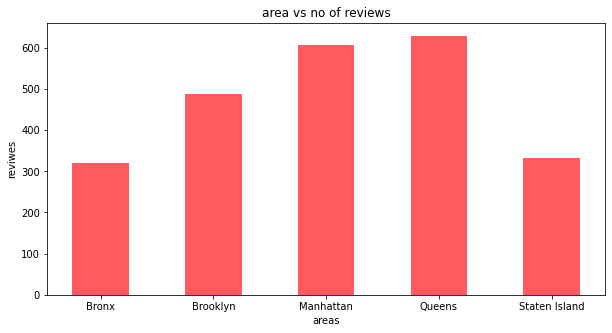

In [24]:
areas = areas_reviews['neighbourhood_group']
reviwes = areas_reviews['number_of_reviews']

# Creating a bar plot
fig = plt.figure(figsize= (10,5))
plt.bar(areas,reviwes,color = '#FF5A5F',
        width = 0.5)

plt.xlabel('areas')
plt.ylabel('reviwes')
plt.title('area vs no of reviews')
plt.show

From this we can asy that they are more no of reviwes in Queen and Manhattan

<function matplotlib.pyplot.show(*args, **kw)>

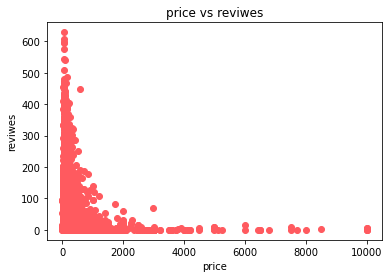

In [40]:
price = new_non_null_df['price']
reviwe = new_non_null_df['number_of_reviews']

# Creating a bar plot
#fig = plt.figure(figsize= (10,5))
plt.scatter(price,reviwe,color = '#FF5A5F')

plt.xlabel('price')
plt.ylabel('reviwes')
plt.title('price vs reviwes')
plt.show

Above scatter viz showes that neighbourhood with less price have more no of reviwes,by this viz we can say most people are prefer to book there stay in place where price is less.

Which hosts are the busiest and why?

In [70]:
busiest_hosts = new_non_null_df.groupby(['host_id','host_name','neighbourhood_group','room_type'])['minimum_nights'].max().reset_index()
busiest_hosts.sort_values(by='minimum_nights',ascending=False).head(10)

,host_id,host_name,neighbourhood_group,room_type,minimum_nights
15840,17550546,Genevieve,Manhattan,Entire home/apt,1250
5095,2697686,Glenn H.,Manhattan,Entire home/apt,999
33113,151084261,Angie,Brooklyn,Private room,999
35299,200401254,Meg,Manhattan,Shared room,999
12537,10720264,John,Manhattan,Entire home/apt,500
4353,2228137,Amanda,Brooklyn,Private room,500
11222,8996336,Laura,Brooklyn,Private room,500
6350,3680008,Aliya,Queens,Entire home/apt,500
28873,82674375,Meg,Brooklyn,Entire home/apt,500
23722,43945071,Shining,Queens,Entire home/apt,480
